
<center><h2>Отчет об изменениях направления миграции населения за последние 10 лет в России</h2>
    <center><h2>Общие данные по всему населению</h2>


***Примечание: данные начинаются с 1990 года и оканчиваются 2021. Отсчет последних 10 лет буду вести до 2021 года. То есть с 2012 по 2021 год включительно.***

**Короткие выводы по итогам анализа:**
Иммиграция в Россию из других стран превышает эмиграцию из России. Основная доля миграций - внутренняя. Люди предпочитают менять место жительства внутри страны, но в разных регионах. Приток населения из других стран может быть обусловлен особыми политические или социальными факторы в России.

Что сделано:
> Матрица корреляций. Признаки с наибольшей и наименьшей корреляцией. Гипотезы.
>
> **График 1.** Общее количество миграций в разные годы
>
> **График 2.** Количество миграций внутри страны и между регионами
>
> **График 3.** Количество миграций из/в другие регионы и страны
>
> **График 4.** Круговая диаграмма соотношения мигрантов по направлениям миграции
>
> **График 5.** График изменения миграционных потоков по годам

### Импортирую библиотеки для анализа данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Прочту датасет и ознакомлюсь с содержимым

In [2]:
data = pd.read_csv("/Users/ivan/DS_educate/Tefal/EntirePopulation.csv", sep=';')

In [3]:
data.head()

,Years,Total Arrivals,Arrived within Country,Arrived within Region,Arrived from other Regions,Arrived from other Countries,Total Leaving,Leaving within Country,Leaving within Region,Leaving to other Regions,Leaving to other Countries,Total Migration Growth,Movements within Country,Movements within Regions,Movements between Regions,Migration Exchange with Foreign Countries
0,1990,5176332,4263109,2415423,1847686,913223,4720270,3990803,2303379,1687424,729467,456062,272306.0,112044.0,160262.0,183756
1,1991,4383020,3690782,2071004,1619778,692238,4155649,3480152,2015722,1464430,675497,227371,210630.0,55282.0,155348.0,16741
2,1992,4192798,3266778,1760637,1506141,926020,3806409,3133266,1741764,1391502,673143,386389,133512.0,18873.0,114639.0,252877
3,1993,3826115,2902835,1511296,1391539,923280,3450277,2967249,1541429,1425820,483028,375838,-64414.0,-30133.0,-34281.0,440252
4,1994,4208308,3016953,1544884,1472069,1191355,3330776,2985153,1554074,1431079,345623,877532,31800.0,-9190.0,40990.0,845732


#### Создам маску, которая оставляет только те строки, где значение Years больше 2011, и присвою эту маску переменной df.

In [4]:
df = data[data['Years'] > 2011]
df.head()

,Years,Total Arrivals,Arrived within Country,Arrived within Region,Arrived from other Regions,Arrived from other Countries,Total Leaving,Leaving within Country,Leaving within Region,Leaving to other Regions,Leaving to other Countries,Total Migration Growth,Movements within Country,Movements within Regions,Movements between Regions,Migration Exchange with Foreign Countries
22,2012,4196143,3778462,2023865,1754597,417681,3901213,3778462,2023865,1754597,122751,294930,NaN,NaN,NaN,294930
23,2013,4496861,4014620,2102036,1912584,482241,4201002,4014620,2102036,1912584,186382,295859,NaN,NaN,NaN,295859
24,2014,4663427,4072603,2075442,1997161,590824,4363437,4052941,2075442,1977499,310496,299990,19662.0,NaN,19662.0,280328
25,2015,4734523,4135906,2053058,2082848,598617,4489139,4135906,2053058,2082848,353233,245384,NaN,NaN,NaN,245384
26,2016,4706411,4131253,2041392,2089861,575158,4444463,4131253,2041392,2089861,313210,261948,NaN,NaN,NaN,261948


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 22 to 31
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Years                                      10 non-null     int64  
 1   Total Arrivals                             10 non-null     int64  
 2   Arrived within Country                     10 non-null     int64  
 3   Arrived within Region                      10 non-null     int64  
 4   Arrived from other Regions                 10 non-null     int64  
 5   Arrived from other Countries               10 non-null     int64  
 6   Total Leaving                              10 non-null     int64  
 7   Leaving within Country                     10 non-null     int64  
 8   Leaving within Region                      10 non-null     int64  
 9   Leaving to other Regions                   10 non-null     int64  
 10  Leaving to other Countries 

In [6]:
df.describe()

,Years,Total Arrivals,Arrived within Country,Arrived within Region,Arrived from other Regions,Arrived from other Countries,Total Leaving,Leaving within Country,Leaving within Region,Leaving to other Regions,Leaving to other Countries,Total Migration Growth,Movements within Country,Movements within Regions,Movements between Regions,Migration Exchange with Foreign Countries
count,10.00000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000,1.0,0.0,1.0,10.000000
mean,2016.50000,4.563038e+06,3.984784e+06,1.977502e+06,2.007282e+06,578254.100000,4.307406e+06,3.982818e+06,1.977502e+06,2.005316e+06,324588.100000,255632.200000,19662.0,NaN,19662.0,253666.000000
std,3.02765,2.742377e+05,2.625831e+05,1.398401e+05,1.681164e+05,81155.255374,3.069134e+05,2.619253e+05,1.398401e+05,1.683627e+05,115341.958948,92962.997036,NaN,NaN,NaN,92124.721048
min,2012.00000,4.120743e+06,3.526597e+06,1.674878e+06,1.754597e+06,417681.000000,3.847540e+06,3.526597e+06,1.674878e+06,1.754597e+06,122751.000000,106474.000000,19662.0,NaN,19662.0,106474.000000
25%,2014.25000,4.332297e+06,3.837502e+06,1.969508e+06,1.866935e+06,568053.250000,4.060952e+06,3.837502e+06,1.969508e+06,1.866935e+06,256139.000000,220254.500000,19662.0,NaN,19662.0,220254.500000
50%,2016.50000,4.684919e+06,4.060569e+06,2.032628e+06,2.040004e+06,589928.500000,4.403950e+06,4.050738e+06,2.032628e+06,2.030174e+06,333221.500000,273525.500000,19662.0,NaN,19662.0,271138.000000
75%,2018.75000,4.745958e+06,4.134743e+06,2.059203e+06,2.090887e+06,597499.250000,4.483021e+06,4.134743e+06,2.059203e+06,2.090887e+06,406387.000000,295626.750000,19662.0,NaN,19662.0,292473.250000
max,2021.00000,4.911566e+06,4.345881e+06,2.102036e+06,2.284630e+06,701234.000000,4.786712e+06,4.345881e+06,2.102036e+06,2.284630e+06,487672.000000,429902.000000,19662.0,NaN,19662.0,429902.000000


#### Узнаю, сколько пропусков в данных

In [7]:
df.isna().sum()

Years                                         0
Total Arrivals                                0
Arrived within Country                        0
Arrived within Region                         0
Arrived from other Regions                    0
Arrived from other Countries                  0
Total Leaving                                 0
Leaving within Country                        0
Leaving within Region                         0
Leaving to other Regions                      0
Leaving to other Countries                    0
Total Migration Growth                        0
Movements within Country                      9
Movements within Regions                     10
Movements between Regions                     9
Migration Exchange with Foreign Countries     0
dtype: int64

**Замечу, что в наборе данных от 90 до 100 процентов отсутствуют данные по передвижениям населения. Эти данные можно заполнить, обучив модель линейной регрессии на данных из выборки прошлых лет. Но сейчас я поступлю проще. Удалю их.**

In [8]:
df = df.drop(columns=['Movements within Country', 'Movements within Regions', 'Movements between Regions'])
df.isna().sum()

Years                                        0
Total Arrivals                               0
Arrived within Country                       0
Arrived within Region                        0
Arrived from other Regions                   0
Arrived from other Countries                 0
Total Leaving                                0
Leaving within Country                       0
Leaving within Region                        0
Leaving to other Regions                     0
Leaving to other Countries                   0
Total Migration Growth                       0
Migration Exchange with Foreign Countries    0
dtype: int64

### Гляну на корреляцию признаков

In [9]:
corr_matrix = df.corr()
corr_matrix.head()

,Years,Total Arrivals,Arrived within Country,Arrived within Region,Arrived from other Regions,Arrived from other Countries,Total Leaving,Leaving within Country,Leaving within Region,Leaving to other Regions,Leaving to other Countries,Total Migration Growth,Migration Exchange with Foreign Countries
Years,1.000000,-0.058293,-0.305645,-0.759637,0.154479,0.791954,-0.016391,-0.299526,-0.759637,0.164967,0.636565,-0.117846,-0.099337
Total Arrivals,-0.058293,1.000000,0.955212,0.661994,0.941308,0.288522,0.955004,0.954558,0.661994,0.935181,0.373503,-0.202938,-0.213466
Arrived within Country,-0.305645,0.955212,1.000000,0.820297,0.879585,-0.007738,0.929031,0.999722,0.820297,0.873959,0.201831,-0.249313,-0.259512
Arrived within Region,-0.759637,0.661994,0.820297,1.000000,0.449427,-0.417132,0.569070,0.816515,1.000000,0.439681,-0.339953,0.074099,0.058165
Arrived from other Regions,0.154479,0.941308,0.879585,0.449427,1.000000,0.334887,0.977710,0.882297,0.449427,0.999318,0.598017,-0.451041,-0.453717


Меня будут интересовать признаки, имеющий коэффициент корреляции больше `0.5`
Вынесу в отдельную переменную, чтобы иметь возможность менять его.

In [10]:
top_corr_coef = 0.5

использую метод `where()` для создания новой матрицы, где значения меньше или равные `acc_corr_coef` заменяются на `NaN`, а затем метод `stack()` для преобразования матрицы в объект Series, содержащий все пары признаков с ненулевыми значениями.

In [11]:
def show_corr(acc_corr_coef, asc):
    # np.triu() создает матрицу с единицами на верхней половине (включая главную диагональ)
    # astype(bool) приводит ее к типу bool и where() заменяет нулевые значения на NaN.
    corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    #stack() создает Series, содержащий все пары признаков с ненулевыми значениями, а reset_index() преобразует индекс в столбцы. 
    corr_pairs = corr_pairs.stack().reset_index()

    # затем фильтрую только пары признаков, где корреляция больше 0.5
    corr_pairs = corr_pairs[corr_pairs[0] > acc_corr_coef]
    
    # сортирую набор данных по убыванию коэффициента корреляции
    sorted_corr_pairs = corr_pairs.sort_values(0, ascending=asc)
    return sorted_corr_pairs

In [12]:
ascF = False # список по убыванию

show_corr(top_corr_coef, ascF).head(25)

,level_0,level_1,0
37,Arrived within Region,Leaving within Region,1.000000
27,Arrived within Country,Leaving within Country,0.999722
46,Arrived from other Regions,Leaving to other Regions,0.999318
77,Total Migration Growth,Migration Exchange with Foreign Countries,0.997784
43,Arrived from other Regions,Total Leaving,0.977710
59,Total Leaving,Leaving to other Regions,0.973911
12,Total Arrivals,Arrived within Country,0.955212
16,Total Arrivals,Total Leaving,0.955004
17,Total Arrivals,Leaving within Country,0.954558
14,Total Arrivals,Arrived from other Regions,0.941308


Теперь хочу посмотреть наименьшую корреляцию, передав функции новые параметры

In [13]:
ascT = True # список по возрастанию
min_corr_coef = -0.001 # больше такого числа, чтобы поближе к нулю

show_corr(min_corr_coef, ascT).head(10)

,level_0,level_1,0
71,Leaving within Region,Migration Exchange with Foreign Countries,0.058165
41,Arrived within Region,Migration Exchange with Foreign Countries,0.058165
70,Leaving within Region,Total Migration Growth,0.074099
40,Arrived within Region,Total Migration Growth,0.074099
56,Arrived from other Countries,Migration Exchange with Foreign Countries,0.118330
55,Arrived from other Countries,Total Migration Growth,0.120903
3,Years,Arrived from other Regions,0.154479
8,Years,Leaving to other Regions,0.164967
30,Arrived within Country,Leaving to other Countries,0.201831
65,Leaving within Country,Leaving to other Countries,0.203356


#### Визуализирую матрицу корреляций

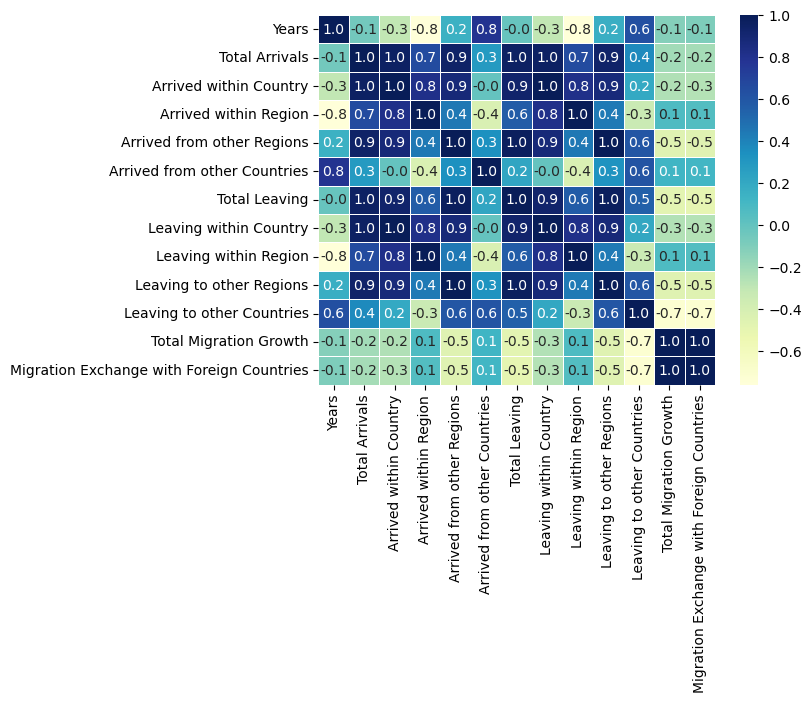

In [14]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, linewidth=.5, fmt=".1f")
  
plt.show()

***Корреляция признаков не является фактом их причинно-следственных связей. Но мы можем заметить определенные закономерности и высказать гипотезы.***

### Наблюдения по итогам анализа:

1. Корреляции между годом и количеством уехавших и приехавших нет, этот факт может указывать на то, что год не является определяющим фактором для количества людей, уезжающих и приезжающих в страну. 

2. Заметил интересную корреляцию (0.974) между признаками общего числа уехавших и уехавших людей в другие регионы внутри страны. Вероятно, люди предпочитают в основном менять место жительства внутри страны, но в разных регионах. 

3. Также отмечу высокую корреляцию признаков общего числа приехавших и уехавших людей (0.955). Это может говорить о том, что в масштабе общей миграции существует численный баланс. 

4. Есть еще одна интересная корреляция (0.792) между годом и числом приехавшего народа из других стран. Это может говорить о том, что политические или социальные факторы в России на отрезке года могут влиять на приток населения из других стран. 


### Для визуализации направлений миграции, буду использовать графики.

#### График №1: общее количество миграций в разные годы. По оси x будут располагаться годы, а по оси y - количество миграций.

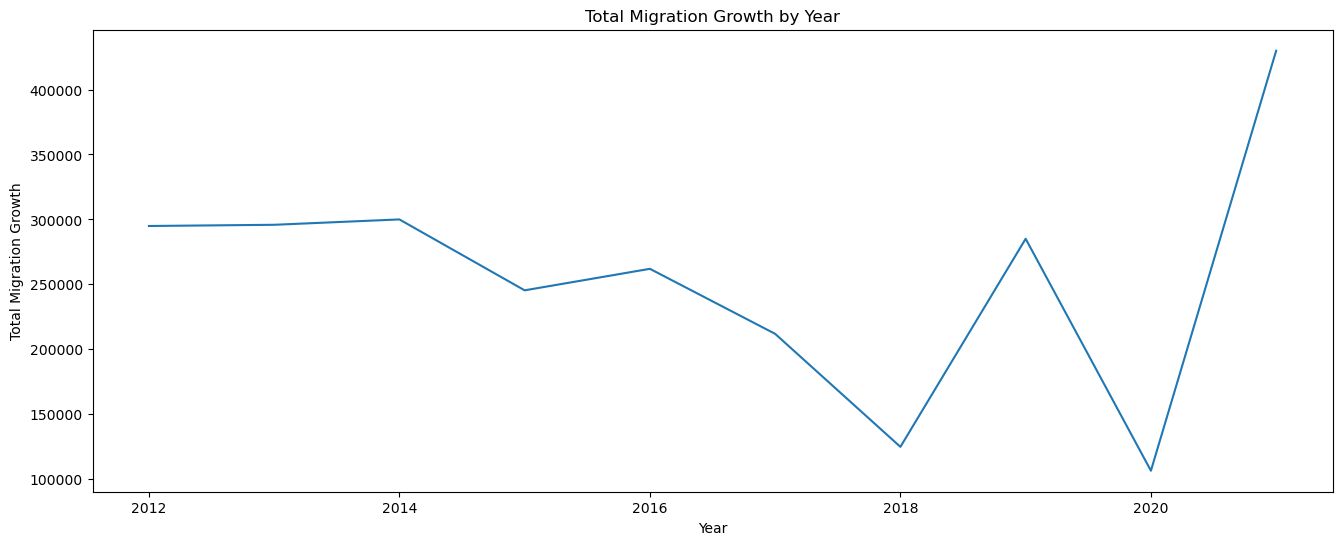

In [15]:
# создаем график миграции по годам
plt.figure(figsize=(16, 6)) # устанавливаем ширину в 16 дюймов, а высоту в 6 дюймов
ax = sns.lineplot(x='Years', y='Total Migration Growth', data=df)
ax.set(title='Total Migration Growth by Year', xlabel='Year', ylabel='Total Migration Growth')
plt.show()

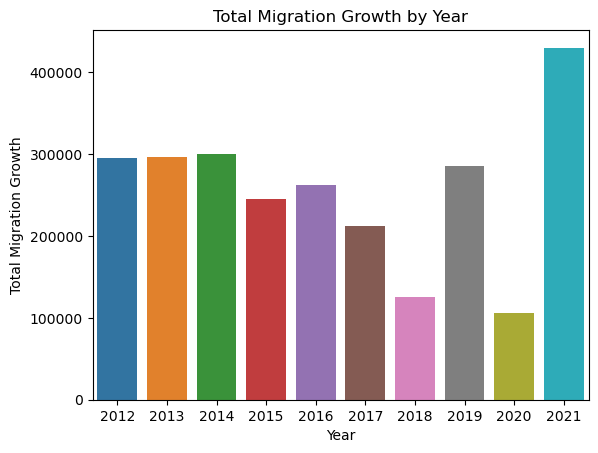

In [16]:
sns.barplot(x='Years', y='Total Migration Growth', data=df)
plt.title('Total Migration Growth by Year')
plt.xlabel('Year')
plt.ylabel('Total Migration Growth')
plt.show()

##### Выводы:
Миграционный рост убывал до 2018, после 2018 был небольшой скачок роста, окончившийся в 2020. С начала 2020 до конца наблюдений 2021 года рост сильно увеличивался и победил рекорды 10-летних наблюдений.
Интересно, связан ли был рост миграций в 2018 году с ЧМ по футболу? Интересно, поспособствовала ли пандемия увеличению роста миграций?

#### График №2:  количество миграций внутри страны и между регионами. 

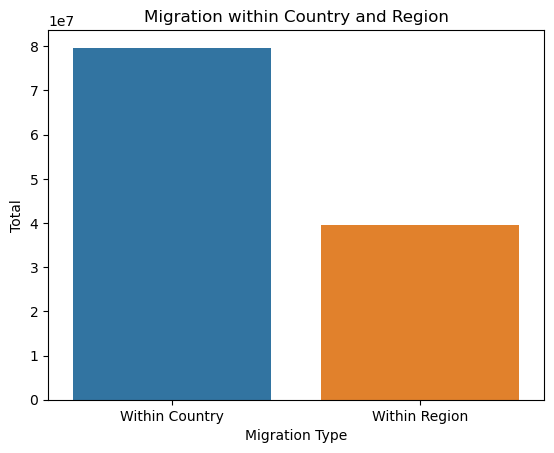

In [17]:
ax = sns.barplot(x=['Within Country', 'Within Region'],
                 y=[df['Arrived within Country'].sum() + df['Leaving within Country'].sum(), 
                    df['Arrived within Region'].sum() + df['Leaving within Region'].sum()])

ax.set(title='Migration within Country and Region', xlabel='Migration Type', ylabel='Total')

plt.show()

##### Выводы:
Судя по графику, люди предпочитают перемещаться между разными регионами, а не внутри одного. Это же подтверждает гипотеза по наблюдениям за матрицей корреляционного анализа.
Разница визуально в 2 раза?

#### График №3: количество миграций из/в другие регионы и страны. Здесь мы выводим на оси x все категории миграций с зарубежа и выводим на ней соответствующие суммы на оси y.

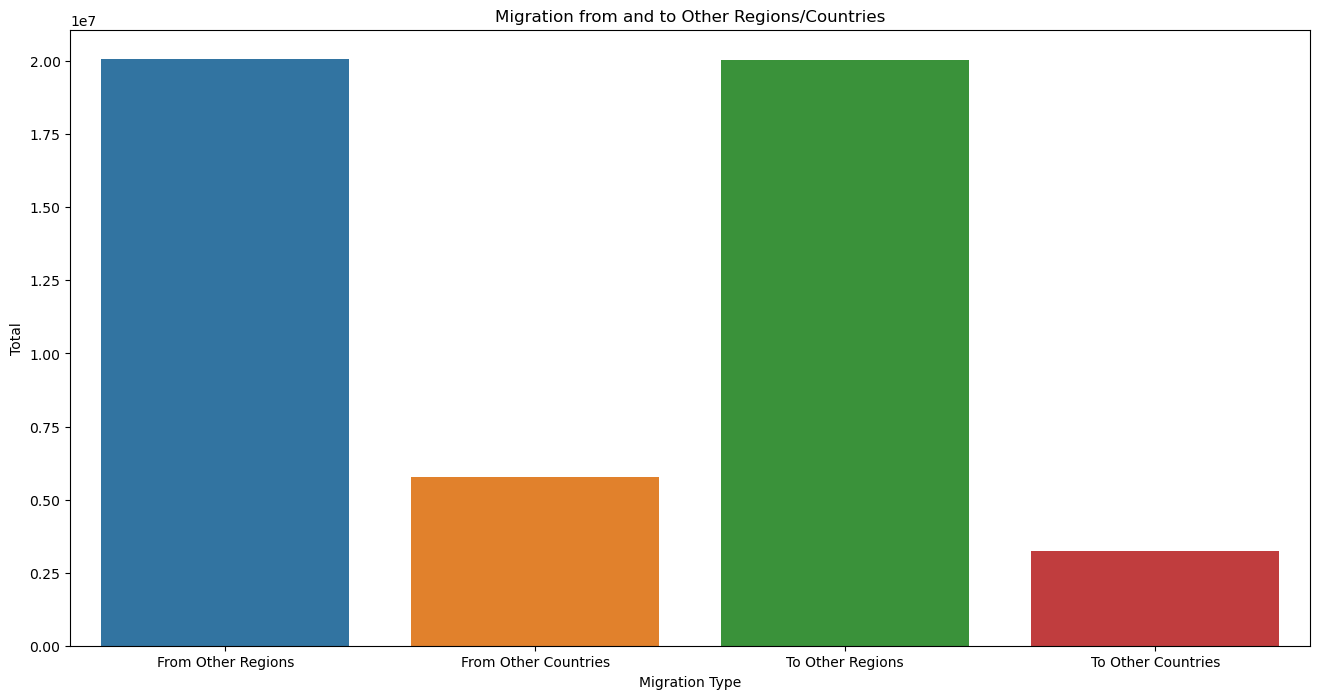

In [18]:
# создаем график миграции с зарубежа
plt.figure(figsize=(16, 8)) 
ax = sns.barplot(x=['From Other Regions', 'From Other Countries', 'To Other Regions', 'To Other Countries'],
                 y=[df['Arrived from other Regions'].sum(), df['Arrived from other Countries'].sum(), 
                    df['Leaving to other Regions'].sum(), df['Leaving to other Countries'].sum()])

ax.set(title='Migration from and to Other Regions/Countries', xlabel='Migration Type', ylabel='Total')

plt.show()

##### Выводы:
Здесь интересно то, что за последние 10 лет иммиграция в Россию из других стран превышает эмиграцию из России.

#### График №4: Круговая диаграмма соотношения мигрантов по направлениям миграции

Здесь мы используем круговую диаграмму, чтобы отобразить соотношение мигрантов по направлениям миграции. 
**Каждый сектор круга соответствует одному из направлений миграции, а его размер определяется долей мигрантов, прибывших из этого направления.**

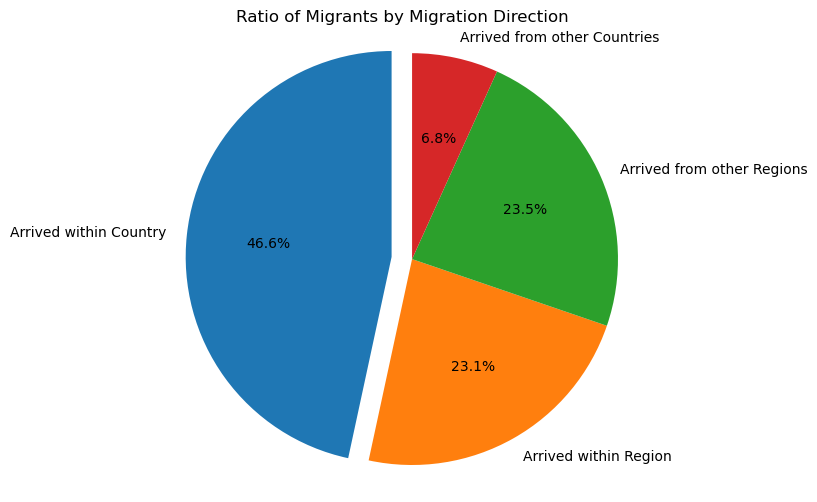

In [19]:
labels = ['Arrived within Country', 'Arrived within Region', 'Arrived from other Regions', 'Arrived from other Countries']
sizes = [df['Arrived within Country'].sum(), 
         df['Arrived within Region'].sum(),
         df['Arrived from other Regions'].sum(), 
         df['Arrived from other Countries'].sum()]

explode = (0.1, 0, 0, 0)  

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Ratio of Migrants by Migration Direction')

plt.show()


##### Выводы
Здесь заметен тот факт, что основную долю миграции составляет внутренняя миграция.

#### График №5: График изменения миграционных потоков по годам

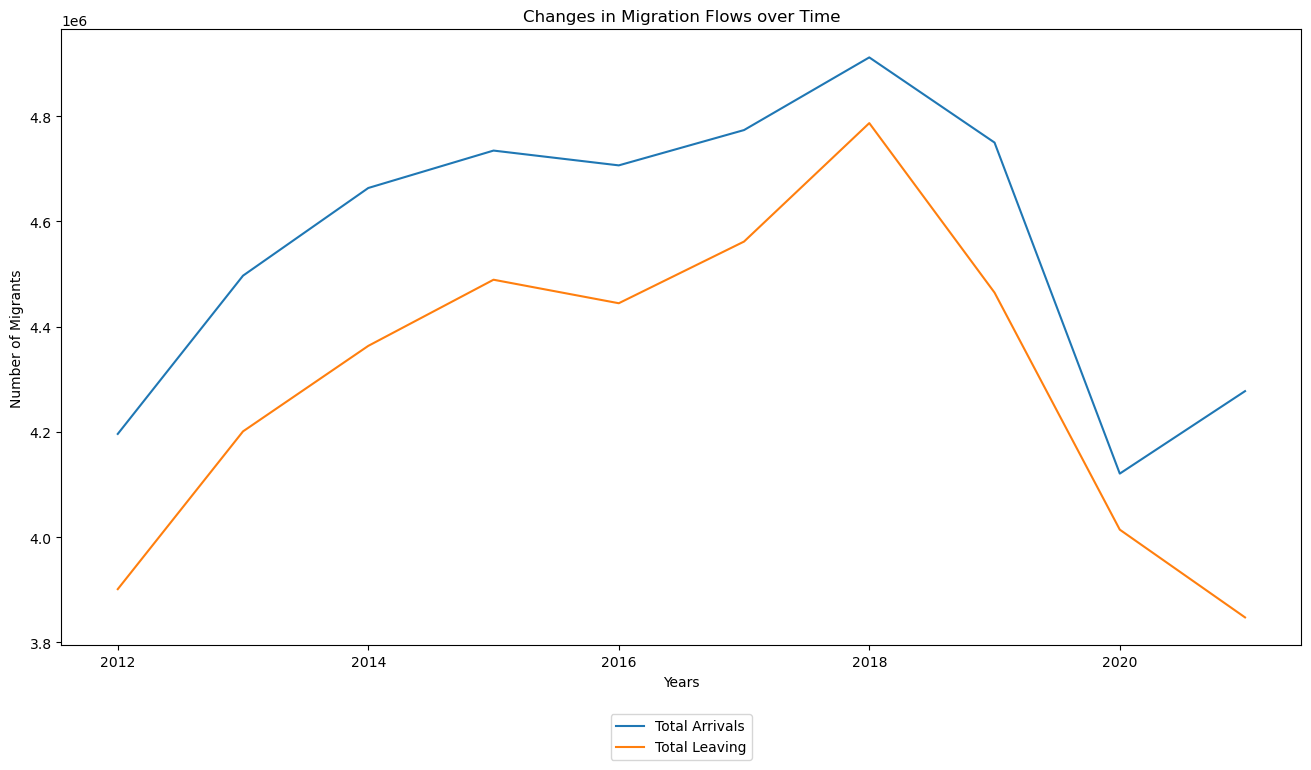

In [20]:
plt.figure(figsize=(16,8))
plt.plot(df['Years'], df['Total Arrivals'], label='Total Arrivals')
plt.plot(df['Years'], df['Total Leaving'], label='Total Leaving')
# размещу легенду не на графике, а под ним
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.title('Changes in Migration Flows over Time')
plt.xlabel('Years')
plt.ylabel('Number of Migrants')
plt.show()

##### Выводы
Число потоков перемещений как на прибыль, так и на убыль имеет тенденцию убывать с течением времени после 2018 года. До 2018 была положительная тенденция. 

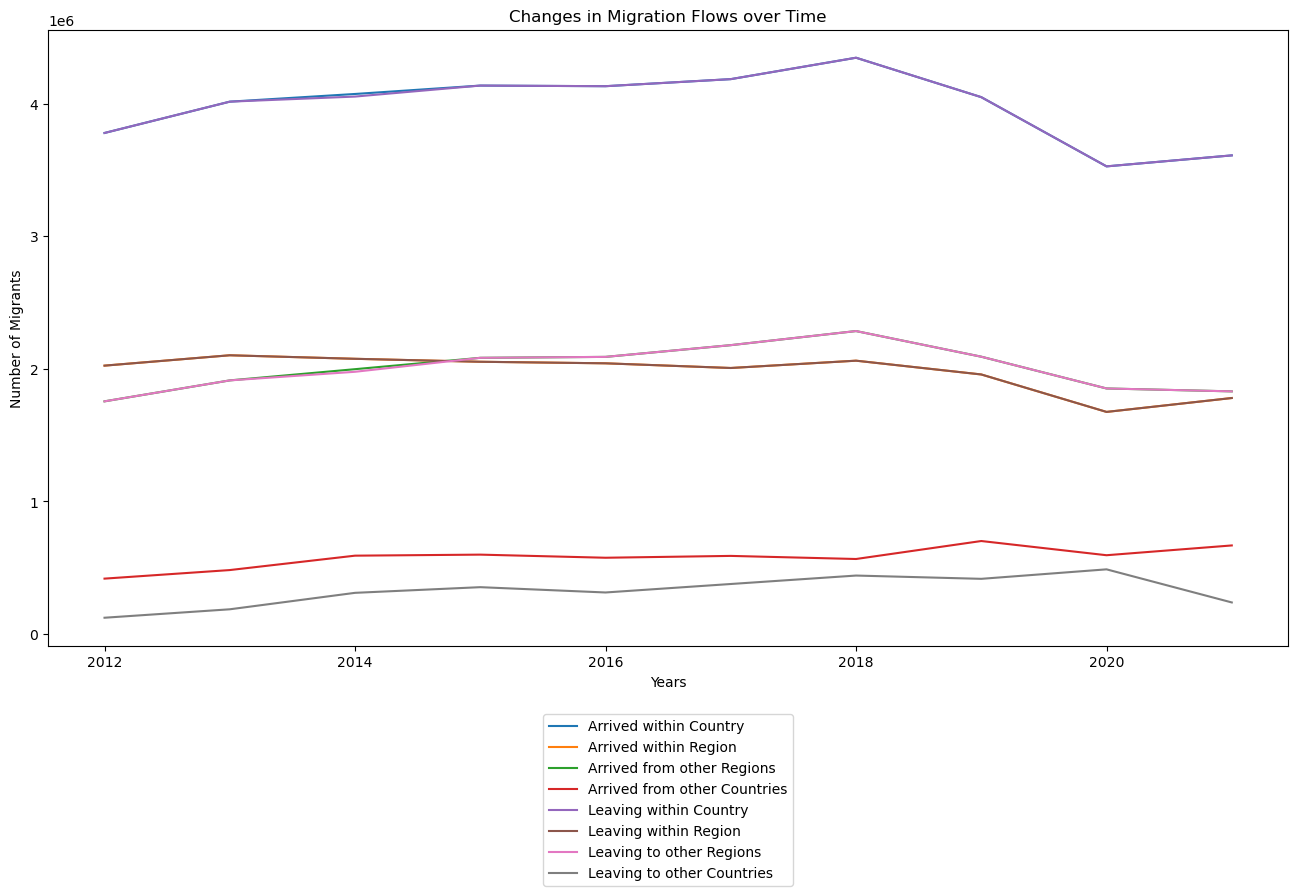

In [21]:
# создаем график изменения миграционных потоков по годам
plt.figure(figsize=(16,8))
plt.plot(df['Years'], df['Arrived within Country'], label='Arrived within Country')
plt.plot(df['Years'], df['Arrived within Region'], label='Arrived within Region')
plt.plot(df['Years'], df['Arrived from other Regions'], label='Arrived from other Regions')
plt.plot(df['Years'], df['Arrived from other Countries'], label='Arrived from other Countries')
plt.plot(df['Years'], df['Leaving within Country'], label='Leaving within Country')
plt.plot(df['Years'], df['Leaving within Region'], label='Leaving within Region')
plt.plot(df['Years'], df['Leaving to other Regions'], label='Leaving to other Regions')
plt.plot(df['Years'], df['Leaving to other Countries'], label='Leaving to other Countries')

# размещу легенду не на графике, а под ним
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.title('Changes in Migration Flows over Time')
plt.xlabel('Years')
plt.ylabel('Number of Migrants')
plt.show()


##### Выводы
Миграционные потоки в основном не имеют ярко выраженных взлетов и падений на графике.